In [212]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [10]:
#Load dataset 
EmpPerformance_data=pd.read_excel('C:/Users/user/Desktop/Data Science/INX Future Inc Employee Performance - Project/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xlsx')
EmpPerformance_data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [11]:
#check the information and data types of the datset
EmpPerformance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

The project used a dataset containing employee data. The primary objective is to predict employee performance based on various factors. The dataset had 1,200 entries including datatypes: integers and object. The data has 28 columns.

In [208]:
#Check missing values in the data
EmpPerformance_data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [14]:
#Check for duplicates
EmpPerformance_data.duplicated().sum()

0

The dataset EmpPerformance_data did not have any missing values or duplicates.

In [15]:
# find the number of unique values in each column - the distict values will help us understand the disitibution of data at hand.
EmpPerformance_data.nunique()

EmpNumber                       1200
Age                               43
Gender                             2
EducationBackground                6
MaritalStatus                      3
EmpDepartment                      6
EmpJobRole                        19
BusinessTravelFrequency            3
DistanceFromHome                  29
EmpEducationLevel                  5
EmpEnvironmentSatisfaction         4
EmpHourlyRate                     71
EmpJobInvolvement                  4
EmpJobLevel                        5
EmpJobSatisfaction                 4
NumCompaniesWorked                10
OverTime                           2
EmpLastSalaryHikePercent          15
EmpRelationshipSatisfaction        4
TotalWorkExperienceInYears        40
TrainingTimesLastYear              7
EmpWorkLifeBalance                 4
ExperienceYearsAtThisCompany      37
ExperienceYearsInCurrentRole      19
YearsSinceLastPromotion           16
YearsWithCurrManager              18
Attrition                          2
P

Explanatory Data Analysis

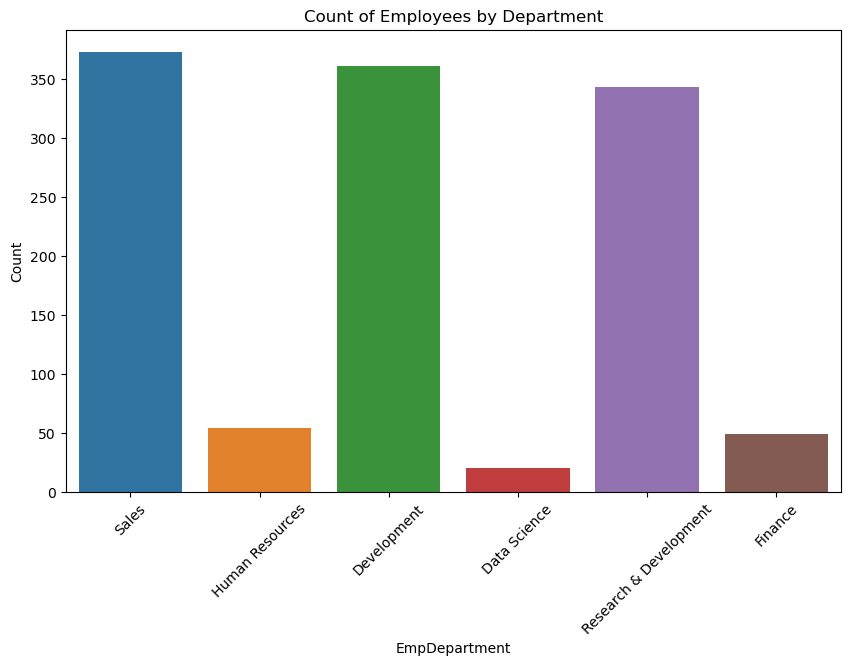

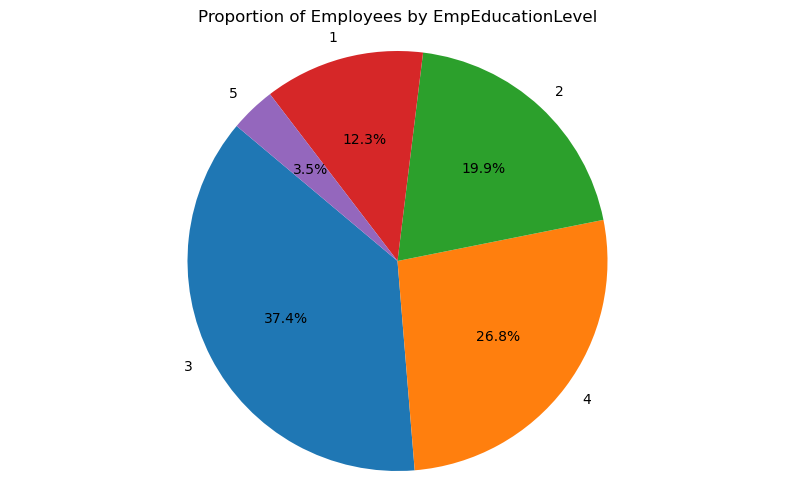

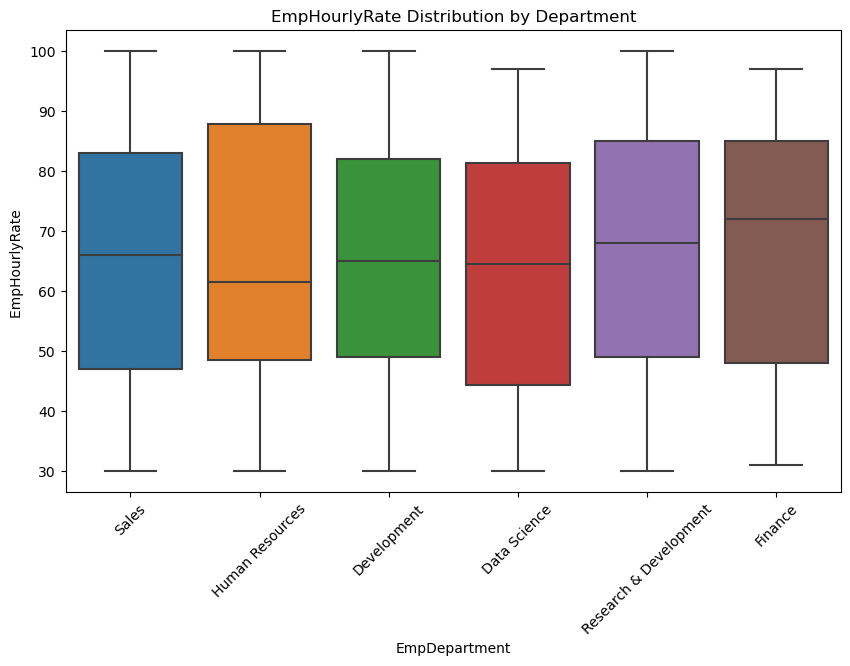

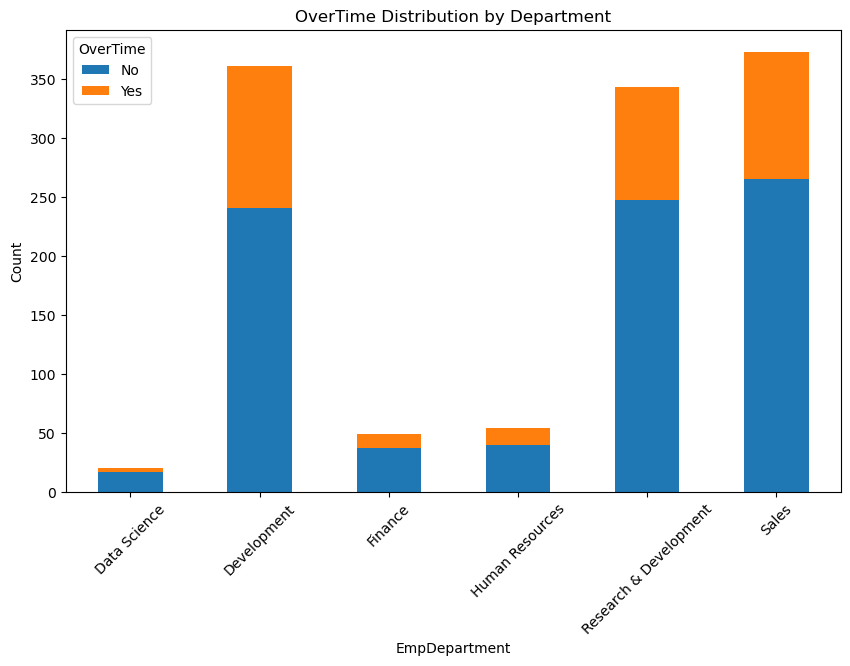

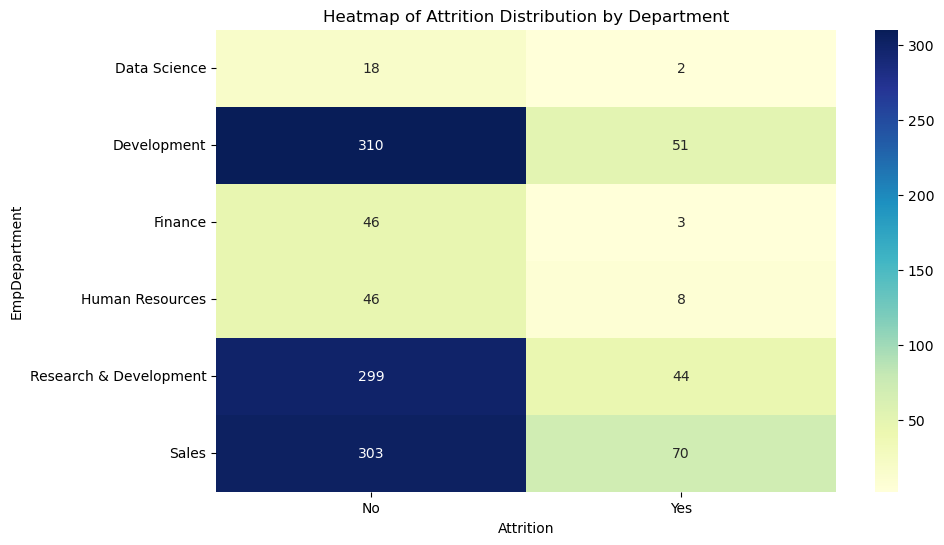

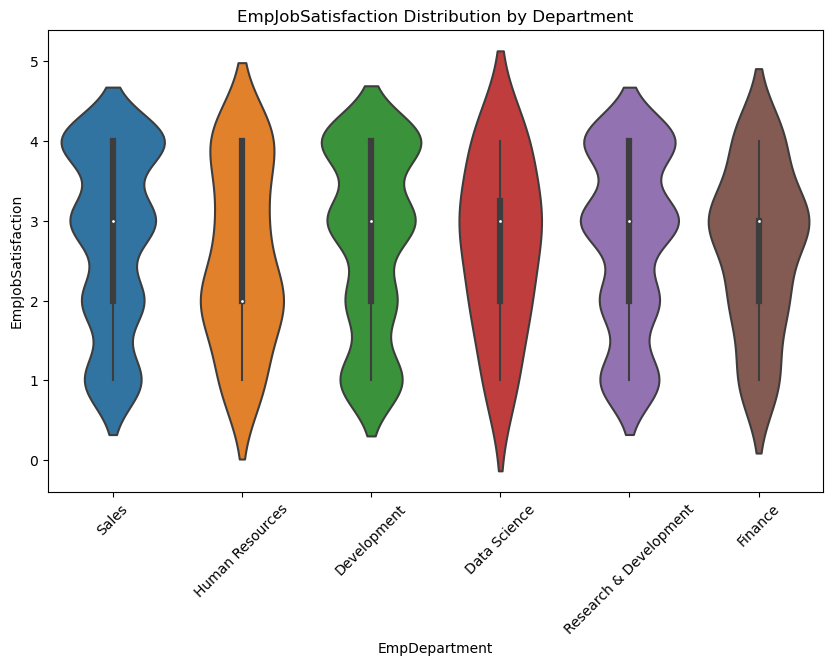

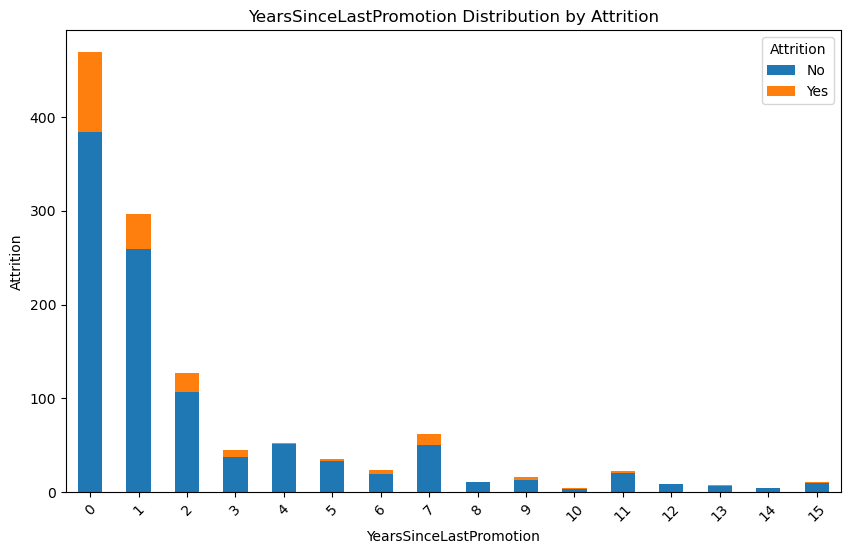

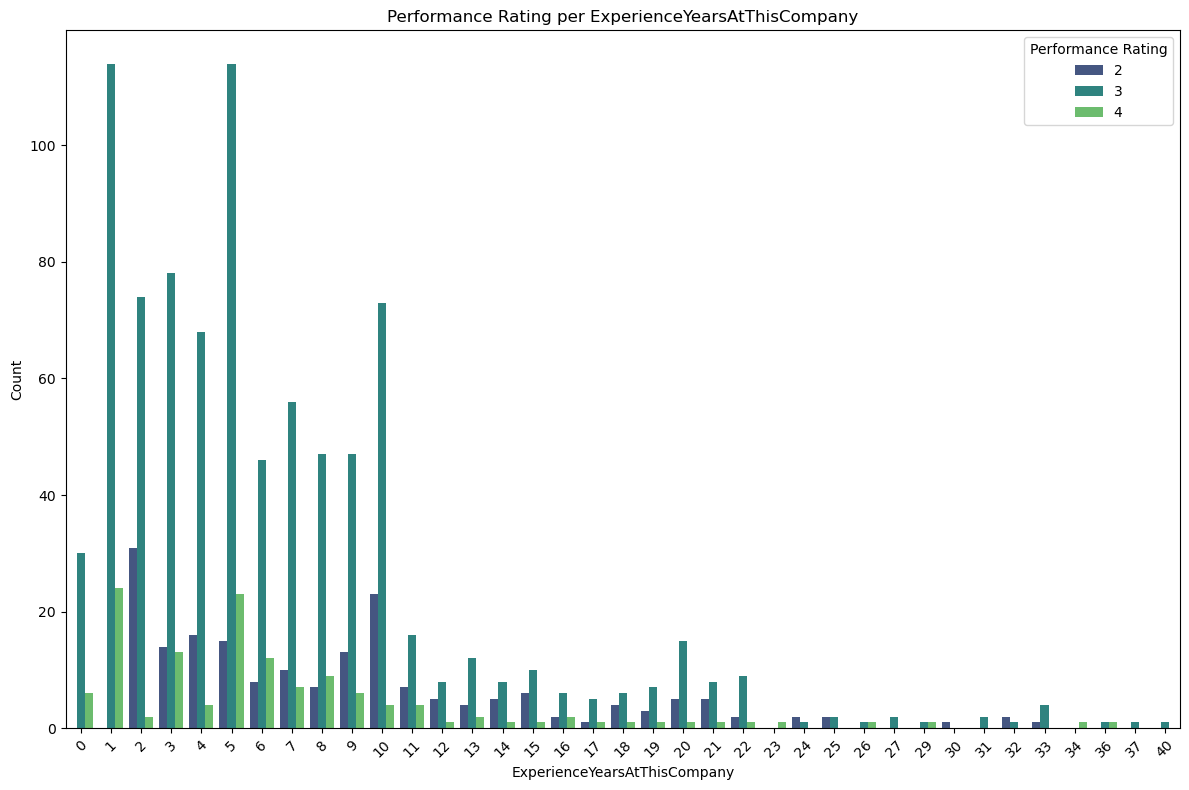

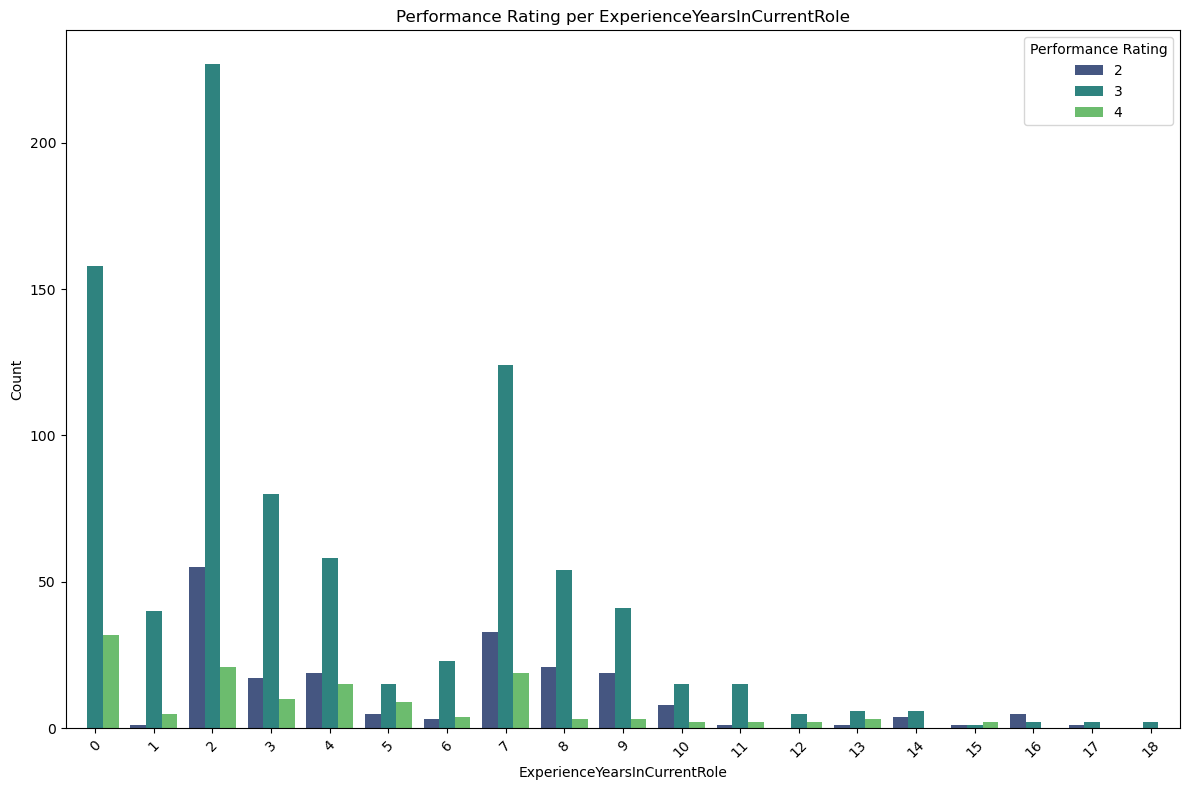

<Figure size 640x480 with 0 Axes>

In [242]:
# plots for categorical columns
   
   #1 barplot of count of employees (EmpNumber) per Department (EmpDepartment) 
plt.figure(figsize=(10, 6))
sns.countplot(data=EmpPerformance_data, x='EmpDepartment')
plt.title('Count of Employees by Department')
plt.xlabel('EmpDepartment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
     
  #2 pie chart of proportion of Employees by EmpEducationLevel  
department_counts = EmpPerformance_data['EmpEducationLevel'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Employees by EmpEducationLevel')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

    
    #3 box plot of EmpHourlyRate Distribution by Department
plt.figure(figsize=(10, 6))
sns.boxplot(data=EmpPerformance_data, x='EmpDepartment', y='EmpHourlyRate')
plt.title('EmpHourlyRate Distribution by Department')
plt.xlabel('EmpDepartment')
plt.ylabel('EmpHourlyRate ')
plt.xticks(rotation=45)
plt.show()
    
    #4 plot of Overtime Distribution by Department
gender_department_counts = pd.crosstab(EmpPerformance_data['EmpDepartment'], EmpPerformance_data['OverTime'])
gender_department_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('OverTime Distribution by Department')
plt.xlabel('EmpDepartment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
    
    #5 Heatmap of Attrition Distribution by Department
gender_department_counts = pd.crosstab(EmpPerformance_data['EmpDepartment'], EmpPerformance_data['Attrition'])
plt.figure(figsize=(10, 6))
sns.heatmap(gender_department_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Attrition Distribution by Department')
plt.xlabel('Attrition')
plt.ylabel('EmpDepartment')
plt.show()

 #6 violin plot of EmpJobSatisfaction Distribution by Department
plt.figure(figsize=(10, 6))
sns.violinplot(data=EmpPerformance_data, x='EmpDepartment', y='EmpJobSatisfaction')
plt.title('EmpJobSatisfaction Distribution by Department')
plt.xlabel('EmpDepartment')
plt.ylabel('EmpJobSatisfaction')
plt.xticks(rotation=45)
plt.show()


# 7 plot of YearsSinceLastPromotion Distribution by Attrition
gender_department_counts = pd.crosstab(EmpPerformance_data['YearsSinceLastPromotion'], EmpPerformance_data['Attrition'])
gender_department_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('YearsSinceLastPromotion Distribution by Attrition')
plt.xlabel('YearsSinceLastPromotion')
plt.ylabel('Attrition')
plt.xticks(rotation=45)
plt.show()


#8 plot of Performance Rating per ExperienceYearsAtThisCompany
plt.figure(figsize=(12, 8))
sns.countplot(data=EmpPerformance_data, x='ExperienceYearsAtThisCompany', hue='PerformanceRating', palette='viridis')
plt.title('Performance Rating per ExperienceYearsAtThisCompany')
plt.xlabel('ExperienceYearsAtThisCompany')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Performance Rating')
plt.tight_layout()
plt.show()


#9 plot of Performance Rating per ExperienceYearsInCurrentRole
plt.figure(figsize=(12, 8))
sns.countplot(data=EmpPerformance_data, x='ExperienceYearsInCurrentRole', hue='PerformanceRating', palette='viridis')
plt.title('Performance Rating per ExperienceYearsInCurrentRole')
plt.xlabel('ExperienceYearsInCurrentRole')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Performance Rating')
plt.tight_layout()
plt.show()

    
plt.tight_layout()
    
plt.show()

1.	The barplot of employees by Deparment shows most of employees at INX Future Inc were in Sales department, followed by Development department then Research & Development. Data Science department had the least number of employees followed by Finance Department 
2.	The pie chart shows of proportion of Employees by EmpEducationLevel. Most of employees (37.4%) have a Bachelor Degree, 26.8% had Masters, 19.9% a College Certification, 12.3% with ‘Below College’ while 3.5 had a Doctorate.
3.	The box plot of EmpHourlyRate Distribution by Department shows employees in the Sales Department, Human Resources, Development, Data Science and Research and Development have hourly rate of between 600 to 70 while those in Finance have an hourly are above 70.
4.	The countlot of Overtime Distribution by Department shows that majority of employees across all departments have no overtime. 
5.	The Heatmap of Attrition Distribution by Department shows number of attrition was highest in Sales Department (70), followed by the Development department (51) and Research & Development (44).
6. The violinplot on EmpJobSatisfaction Distribution by Department shows majority of employees have 3 'High' jo satisfaction. However, a large number still lies at 1 'Low'and 2 'Medium' job satisfaction.
7. The plot of YearsSinceLastPromotion Distribution by Attrition shows that the number of attrition -those who have left INX Future Inc - are mostly those who had been promoted in recent years with 0-3 years since last promotion.
8. and 9.  The plot of Performance Rating per ExperienceYearsAtThisCompany; and plot of Performance Rating per ExperienceYearsInCurrentRole shows most performance rating of 2 'Good' was among employees with 2 to 10 years experince at INX Future Inc and in their current role respectively.

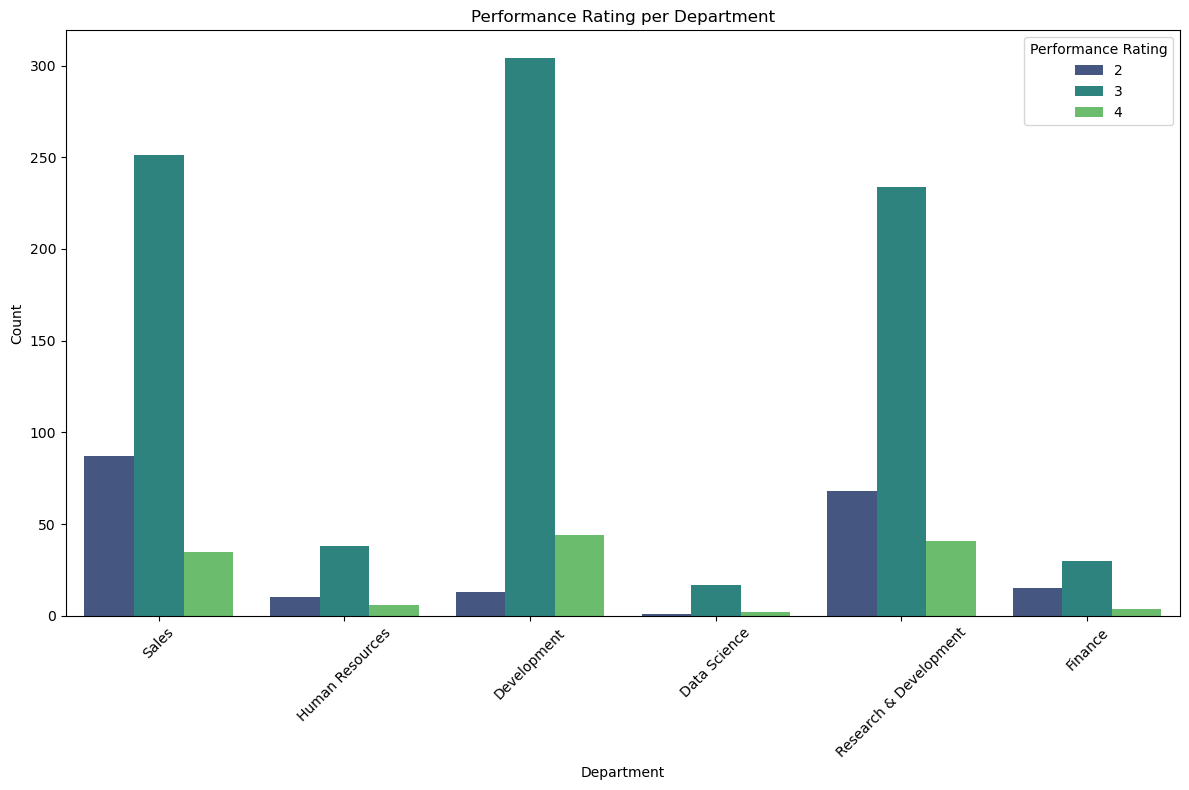

In [194]:
plt.figure(figsize=(12, 8))
sns.countplot(data=EmpPerformance_data, x='EmpDepartment', hue='PerformanceRating', palette='viridis')
plt.title('Performance Rating per Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Performance Rating')
plt.tight_layout()
plt.show()

A. Department-wise performances

The Countplot of 'Performance Rating per Department' shows the performance of employees in INX Future Inc. Most of employees across al departments - Sales, Human Resources, Development, Data Science, and Research & Development - were rated 3 'Excellent'. No employee had been rated 1 'Bad'.

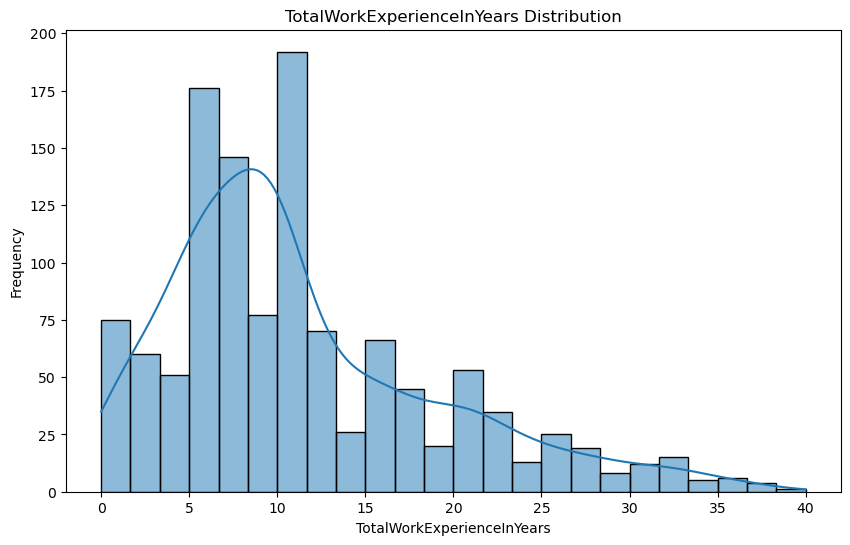

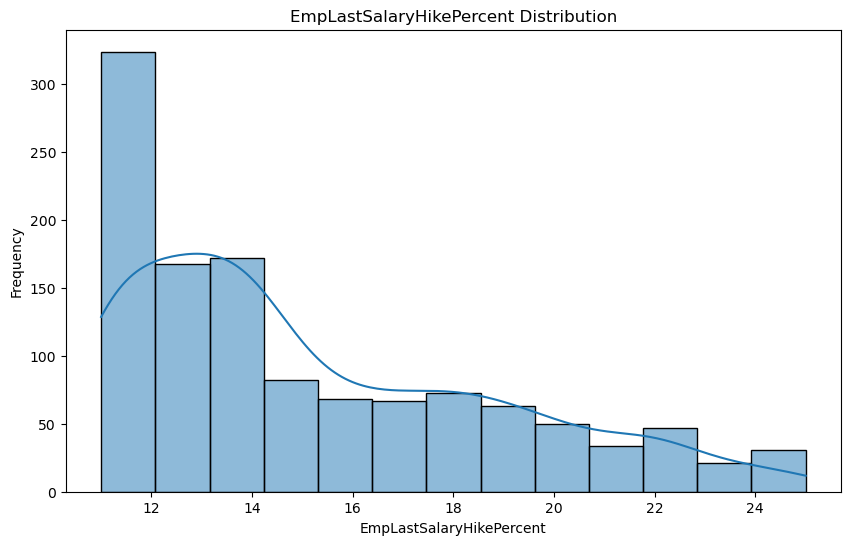

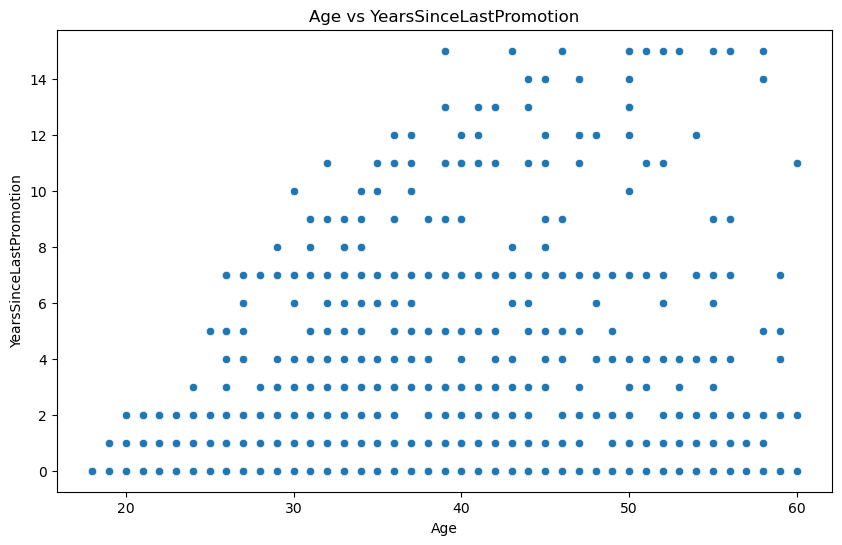

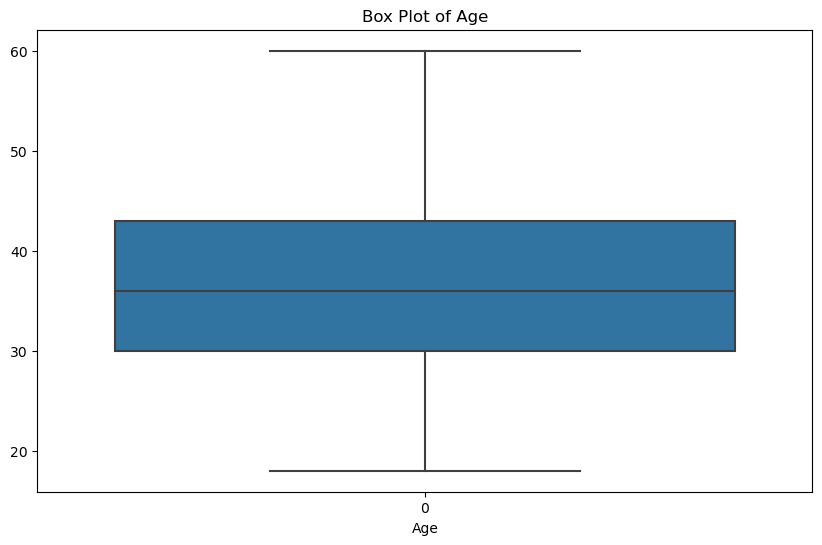

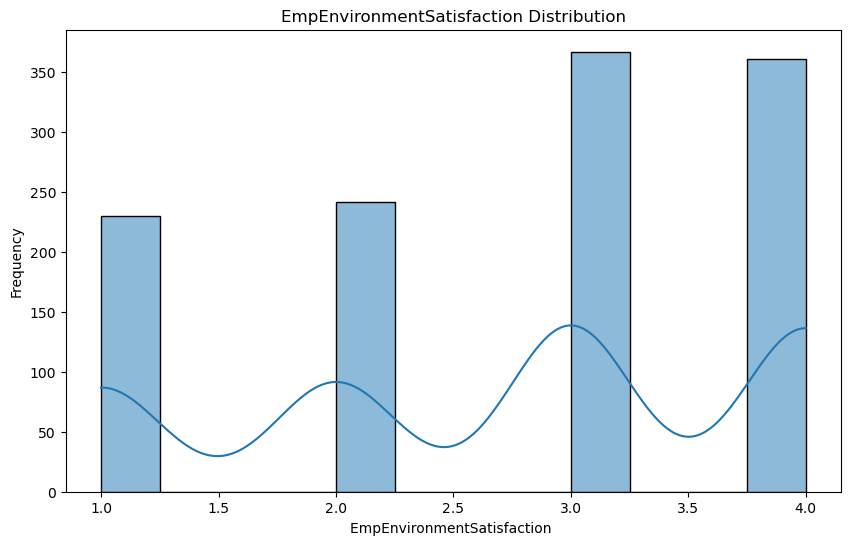

In [226]:
#plot numerical columns

   #1 Histplot for Employees' Distribution per WorkExperienceInYears
plt.figure(figsize=(10, 6))
sns.histplot(EmpPerformance_data['TotalWorkExperienceInYears'], kde=True)
plt.title('TotalWorkExperienceInYears Distribution')
plt.xlabel('TotalWorkExperienceInYears')
plt.ylabel('Frequency')
plt.show()

 #2 Histplot for Employees' Distribution Per EmpLastSalaryHikePercent
plt.figure(figsize=(10, 6))
sns.histplot(EmpPerformance_data['EmpLastSalaryHikePercent'], kde=True)
plt.title('EmpLastSalaryHikePercent Distribution')
plt.xlabel('EmpLastSalaryHikePercent')
plt.ylabel('Frequency')
plt.show()

 #3 scatter plot of Age and YearsSinceLastPromotion
plt.figure(figsize=(10, 6))
sns.scatterplot(data=EmpPerformance_data, x='Age', y='YearsSinceLastPromotion')
plt.title('Age vs YearsSinceLastPromotion')
plt.xlabel('Age')
plt.ylabel('YearsSinceLastPromotion')
plt.show()

#4 Box plot for Age 
plt.figure(figsize=(10, 6))
sns.boxplot(data=EmpPerformance_data['Age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

#5 Histplot for Employees' Distribution by EmpEnvironmentSatisfaction 
plt.figure(figsize=(10, 6))
sns.histplot(EmpPerformance_data['EmpEnvironmentSatisfaction'], kde=True)
plt.title('EmpEnvironmentSatisfaction Distribution')
plt.xlabel('EmpEnvironmentSatisfaction ')
plt.ylabel('Frequency')
plt.show()



1.	The histplot for Employees' WorkExperienceInYears - Most individuals seem to have between approximately 5 and 10 years of work experience, with the highest frequency just above 10 years. The line graph overlays the histogram. It shows a distribution curve that fits over the top of the histogram bars.  The curve peaks where there is the highest frequency of work experience and tapers off towards both ends of the experience range.

2. The histplot for Employees' Distribution Per EmpLastSalaryHikePercentMost shows that most employees received a salary hike of 11% to 14% in the previous salary increment. Less than 200 employees received a salary hike of more than 20%.

3. The scatter plot of Age and YearsSinceLastPromotion shows that most employees have been promoted in the last seven years across the ages. 

4. The box plot for age shows most employees are aged between 30 years and below 45 years.
5. The histplot for Employees' Distribution by EmpEnvironmentSatisfaction shows close to 500 employees have low and medium work environment satisfaction from INX Future Inc.



Transform the data. 
Since the dataset has object data types, I  convert these labels to numeric (int64) form, so they become machine-readable through label encoding.

First, I have to find object data types. 

In [58]:
cat_col = EmpPerformance_data.select_dtypes(include = 'object').columns
cat_col

Index(['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime',
       'Attrition'],
      dtype='object')

In [60]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(data):
    le = LabelEncoder()
    for column in label_list:
        data[column] = le.fit_transform(data[column])
    return data

label_list = ['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus',
              'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime',
              'Attrition']

# Create a new name for the dataset where categorical columns have been encoded into numerical values using LabelEncoder
transformed_data = label_encoder(EmpPerformance_data.copy())

# Display transformed data
transformed_data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,0,32,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,1,47,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,2,40,1,1,1,5,13,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,3,41,1,0,0,3,8,2,10,4,...,2,23,2,2,21,6,12,6,0,3
4,4,60,1,2,2,5,13,2,16,4,...,4,10,1,3,2,2,2,2,0,3


In [66]:
#confirm if data as been encoded
transformed_data.dtypes

EmpNumber                       int32
Age                             int64
Gender                          int32
EducationBackground             int32
MaritalStatus                   int32
EmpDepartment                   int32
EmpJobRole                      int32
BusinessTravelFrequency         int32
DistanceFromHome                int64
EmpEducationLevel               int64
EmpEnvironmentSatisfaction      int64
EmpHourlyRate                   int64
EmpJobInvolvement               int64
EmpJobLevel                     int64
EmpJobSatisfaction              int64
NumCompaniesWorked              int64
OverTime                        int32
EmpLastSalaryHikePercent        int64
EmpRelationshipSatisfaction     int64
TotalWorkExperienceInYears      int64
TrainingTimesLastYear           int64
EmpWorkLifeBalance              int64
ExperienceYearsAtThisCompany    int64
ExperienceYearsInCurrentRole    int64
YearsSinceLastPromotion         int64
YearsWithCurrManager            int64
Attrition   

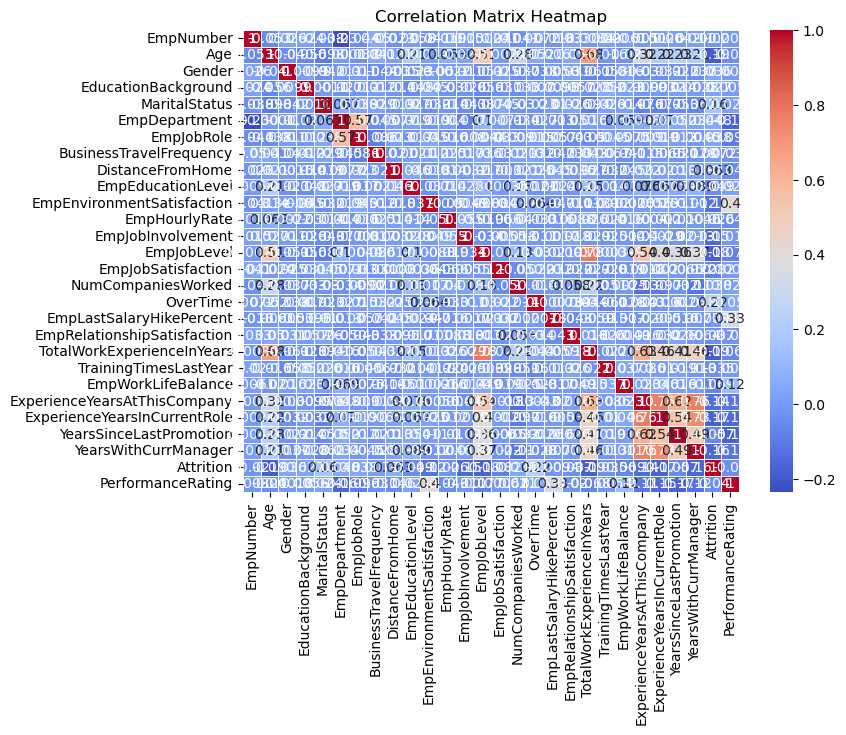

In [108]:
df = pd.DataFrame(transformed_data)
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [110]:
#Because of the complexity of the correlation matrix, there is a need to set an absolute value, 0.5, as the threshold for selecting the variables. 


threshold = 0.5 

# Empty list to store pairs
correlated_pairs = []

# Iterate through the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)): 
        if abs(correlation_matrix.iloc[i, j]) >= threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
            correlated_pairs.append(pair)

# Print the correlated pairs
for pair in correlated_pairs:
    print(f"Correlation between {pair[0]} and {pair[1]} is {pair[2]}")

Correlation between Age and EmpJobLevel is 0.5091391713818485
Correlation between Age and TotalWorkExperienceInYears is 0.6808863776423193
Correlation between EmpDepartment and EmpJobRole is 0.5689727300237089
Correlation between EmpJobLevel and TotalWorkExperienceInYears is 0.7842285875836238
Correlation between EmpJobLevel and ExperienceYearsAtThisCompany is 0.5403771052798658
Correlation between TotalWorkExperienceInYears and ExperienceYearsAtThisCompany is 0.633554768463762
Correlation between ExperienceYearsAtThisCompany and ExperienceYearsInCurrentRole is 0.764101587123479
Correlation between ExperienceYearsAtThisCompany and YearsSinceLastPromotion is 0.620230269214471
Correlation between ExperienceYearsAtThisCompany and YearsWithCurrManager is 0.7592581958041325
Correlation between ExperienceYearsInCurrentRole and YearsSinceLastPromotion is 0.5406004608224716
Correlation between ExperienceYearsInCurrentRole and YearsWithCurrManager is 0.7289728836492501


B. Top 3 Important Factors effecting employee performance

Correlation between EmpJobLevel and TotalWorkExperienceInYears is 0.78
Correlation between ExperienceYearsAtThisCompany and ExperienceYearsInCurrentRole is 0.76
Correlation between ExperienceYearsAtThisCompany and YearsWithCurrManager is 0.759

This means, correlation matrix using the 26 variables to show the strength of the relationship between the variables shows TotalWorkExperienceInYears and EmpJobLevel has a strong positive correlation of 0.78
ExperienceYearsInCurrentRole and ExperienceYearsAtThisCompany had a strong positive correlation of 0.76
YearsWithCurrManager and ExperienceYearsAtThisCompany had a strong positive correlation of 0.759


Therefore, factors affecting employee performance include:
a) TotalWorkExperienceInYears
b) ExperienceYearsInCurrentRole
c) ExperienceYearsAtThisCompany

Model Building

Define Problem Statement: Building a model to predict employee performance at INX Future Inc

First, I split the data into training and testing sets:
I will also evaluate the model accuracy on both training and test datasets using .score

In [118]:
#split the data into the target variables and features 
#make PerformanceRating column as the target variable 

X = transformed_data.drop('PerformanceRating', axis=1)
y = transformed_data['PerformanceRating']

In [69]:
# Split the data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((960, 27), (240, 27), (960,), (240,))

In [214]:
#Feature Scaling to rescale data to have a mean of 0 and standard deviation of 1 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

C. A trained model which can predict the employee performance based on factors as inputs. This
will be used to hire employees

I will build 4 models and compare their accuracy scores.

1. Linear Regression 

In [215]:
# instantiate the model
model = LinearRegression()

# fit the model to the training data
model.fit(X_train, y_train)

# score model on the testing data
model.score(X_test, y_test)

0.26294953891581385

In [216]:
# make predictions  
y_pred = model.predict(X_test)

# check our r2 score
from sklearn.metrics import r2_score, mean_squared_error

print('R2 score: ', r2_score(y_test, y_pred))
print('Mean square error: ', mean_squared_error(y_test, y_pred))

R2 score:  0.26294953891581385
Mean square error:  0.17192725685984592


In [217]:
#Display the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print('Intercept: ', model.intercept_)
print(coefficients)

Intercept:  2.9375
                              Coefficient
EmpNumber                       -0.009214
Age                             -0.009316
Gender                          -0.003171
EducationBackground             -0.010278
MaritalStatus                    0.008972
EmpDepartment                   -0.067689
EmpJobRole                      -0.023212
BusinessTravelFrequency         -0.011617
DistanceFromHome                -0.018447
EmpEducationLevel                0.023736
EmpEnvironmentSatisfaction       0.224279
EmpHourlyRate                   -0.007910
EmpJobInvolvement               -0.011418
EmpJobLevel                      0.002006
EmpJobSatisfaction               0.004541
NumCompaniesWorked               0.009285
OverTime                         0.017039
EmpLastSalaryHikePercent         0.192717
EmpRelationshipSatisfaction      0.001943
TotalWorkExperienceInYears       0.004124
TrainingTimesLastYear           -0.012744
EmpWorkLifeBalance               0.060303
ExperienceYears

The coefficients represent the impact of each feature on the target/ dependent variable (PerformanceRating).
A positive coefficient indicates that an increase in that feature leads to a higher likelihood of the PerformanceRating (e.g., EmpLastSalaryHikePercent). EmpEnvironmentSatisfaction has the highest positive impact (0.224), suggesting that higher satisfaction increases the odds of the target outcome. ExperienceYearsInCurrentRole has the highest negative impact (-0.088), implying that more years in the current role decrease the odds.

2. Decision Tree Classifier

In [218]:
# Create a DecisionTreeClassifier model
dt = DecisionTreeClassifier()

# Fit the model to the training data
dt.fit(X_train, y_train)

# Evaluate model accuracy on training data
train_accuracy = dt.score(X_train, y_train)
print('Training Accuracy:', train_accuracy)

# Evaluate model accuracy on test data
test_accuracy = dt.score(X_test, y_test)
print('Test Accuracy:', test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 0.9041666666666667


The model's training accuracy of 100% may suggest the model may have overfitted the training data. The test accuracy at 88.75% is robust, indicating decent generalization.

3. Support Vector Machines (SVMs) 

In [219]:
# Create a Support Vector Classifier (SVC) model
svc = SVC(kernel='linear', C=1.0, random_state=42)

# Fit the model to the training data
svc.fit(X_train, y_train)

# Evaluate model accuracy on test data
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Test Accuracy:', accuracy)

Test Accuracy: 0.8458333333333333


4. Random Forest Classifier

In [213]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# You can adjust the number of estimators and other hyperparameters
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Feature importance (optional)
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           2       0.93      0.90      0.91        29
           3       0.95      0.99      0.97       184
           4       1.00      0.74      0.85        27

    accuracy                           0.95       240
   macro avg       0.96      0.88      0.91       240
weighted avg       0.95      0.95      0.95       240

Confusion Matrix:
[[ 26   3   0]
 [  2 182   0]
 [  0   7  20]]
                         Feature  Importance
10    EmpEnvironmentSatisfaction    0.221368
17      EmpLastSalaryHikePercent    0.198401
24       YearsSinceLastPromotion    0.087936
0                      EmpNumber    0.054139
6                     EmpJobRole    0.037205
23  ExperienceYearsInCurrentRole    0.036284
5                  EmpDepartment    0.034896
11                 EmpHourlyRate    0.034104
1                            Age    0.030407
22  ExperienceYearsAtThisCompany    0.028367
19    TotalWorkExperie

The model has high overall accuracy (0.95). Class 3 has the highest recall (0.99) and F1-score (0.97), indicating it is the most accurately predicted class. Class 2 also performs well with high precision (0.93) and recall (0.90). Class 4 has perfect precision (1.00) but lower recall (0.74), suggesting the model sometimes fails to identify instances of class 4 correctly.

Based on the models’ performance metrics, Random Forest Classifier will be the best model to predict employee performance at INX Future Inc. 
